<a href="https://colab.research.google.com/github/Elwing-Chou/tiba0619/blob/main/cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# pandas型態: 1.DataFrame(2-D) 2. Series(1-D)
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [2]:
import numpy as np
x = np.array(df)
print(x.shape)

(150, 4)


fit + transform

訓練資料: fit(找到min/max) -> transform

測試資料: transform

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scale = scaler.fit_transform(x)
pd.DataFrame(x_scale)

,0,1,2,3
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [3]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=3)
# ! x_scale
cluster.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [4]:
# 作為經典案例
cluster.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [5]:
# 把他當成標註的答案存起來或做一個決策樹
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [6]:
# 如果我不知道k該是多少
from sklearn.metrics import silhouette_score
for k in range(2, 10):
    test_cluster = KMeans(n_clusters=k, n_init="auto")
    test_cluster.fit(x)
    score = silhouette_score(x, test_cluster.labels_)
    print(k, score)

2 0.6810461692117462
3 0.5528190123564095
4 0.49764331793219224
5 0.36892049356935436
6 0.4552896790569432
7 0.3452178646369998
8 0.3098947204918639
9 0.3125565075136459


畫圖最基礎: matplotlib


<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>

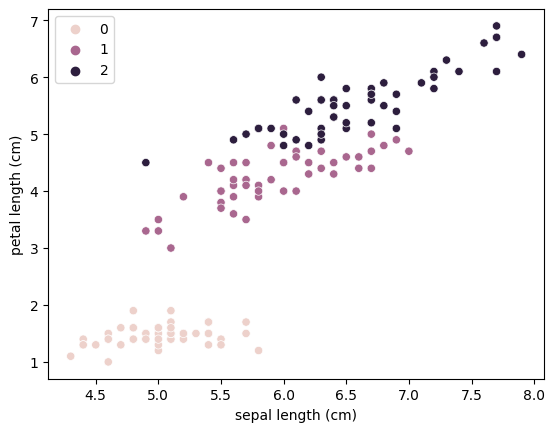

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
# xs = df["sepal length (cm)"]
# ys = df["petal length (cm)"]
# sns.scatterplot(x=xs, y=ys)
sns.scatterplot(data=df,
        x="sepal length (cm)",
        y="petal length (cm)",
        hue=iris["target"])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>

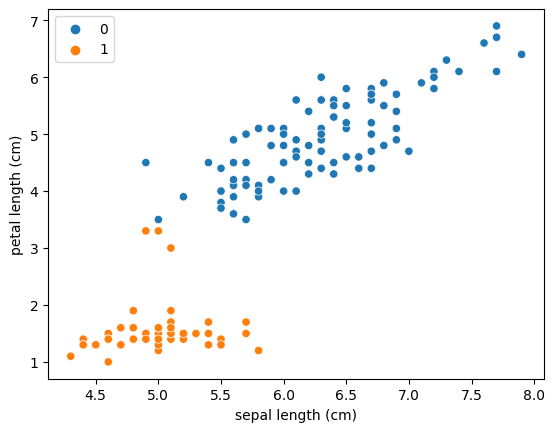

In [8]:
cluster = KMeans(n_clusters=2)
cluster.fit(x)
sns.scatterplot(data=df,
        x="sepal length (cm)",
        y="petal length (cm)",
        hue=cluster.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>

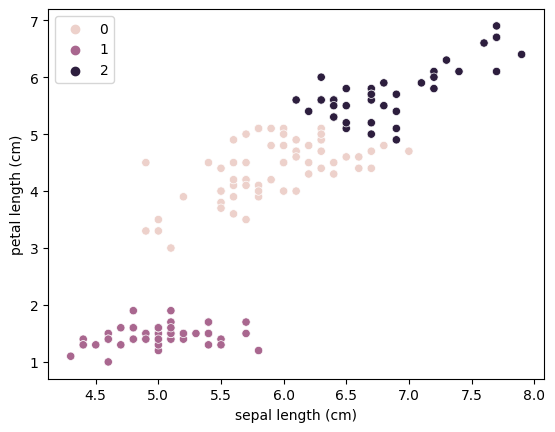

In [9]:
cluster = KMeans(n_clusters=3)
cluster.fit(x)
sns.scatterplot(data=df,
        x="sepal length (cm)",
        y="petal length (cm)",
        hue=cluster.labels_)